In [2]:
import seaborn as sns
import numpy as np
import tensorflow as tf
import pandas as pd
import os, math, matplotlib, sklearn, keras
from functools import reduce
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
from tqdm import tqdm

In [3]:
gunVio2023 = pd.read_csv(os.path.dirname(os.getcwd())+"\dataset\gun violence 2023.csv")
gunVio2023['year'] = 2023
gunVio2022 = pd.read_csv(os.path.dirname(os.getcwd())+"\dataset\gun violence 2022.csv")
gunVio2022['year'] = 2022
gunVio2021 = pd.read_csv(os.path.dirname(os.getcwd())+"\dataset\gun violence 2021.csv")
gunVio2021['year'] = 2021
gunVio2020 = pd.read_csv(os.path.dirname(os.getcwd())+"\dataset\gun violence 2020.csv")
gunVio2020['year'] = 2020
gunVio2019 = pd.read_csv(os.path.dirname(os.getcwd())+"\dataset\gun violence 2019.csv")
gunVio2019['year'] = 2019
gunVio2018 = pd.read_csv(os.path.dirname(os.getcwd())+"\dataset\gun violence 2018.csv")
gunVio2018['year'] = 2018

In [4]:
gunVio2018

,Incident ID,Incident Date,State,City Or County,Address,# Victims Injured,# Victims Killed,# Subjects-Suspects Injured,# Subjects-Suspects Killed,# Subjects-Suspects Arrested,Operations,year
0,1288201,"December 30, 2018",Texas,Houston,15491 Wallisville Rd,1,1,0,0,2,NaN,2018
1,1288224,"December 30, 2018",North Carolina,Randleman,1029 High Point St,1,0,0,0,0,NaN,2018
2,1288918,"December 30, 2018",California,Madera,20000 block of Avenue 6,1,0,0,0,0,NaN,2018
3,1287553,"December 29, 2018",Texas,Fort Worth,1500 block of E Berry St,1,0,0,0,0,NaN,2018
4,1289168,"December 29, 2018",Indiana,Marion,2300 block of Gallatin St,0,3,0,0,2,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
618,1019174,"January 1, 2018",North Carolina,Charlotte,2305 Farmer St,2,0,0,0,0,NaN,2018
619,1018466,"January 1, 2018",California,Los Angeles,Baring Cross and W 88th St,1,0,0,0,0,NaN,2018
620,1018902,"January 1, 2018",Alabama,Bessemer (Concord),6400 block of William Dr,0,1,0,0,0,NaN,2018
621,1019515,"January 1, 2018",Michigan,Flint,5501 Granville Ave,0,1,0,0,0,NaN,2018


In [5]:
frames = [gunVio2018,
          gunVio2019,
          gunVio2020,
          gunVio2021,
          gunVio2022,
          gunVio2023]

mergedDataset = reduce(lambda top, bottom: top.append(bottom, ignore_index=True), frames)
mergedDataset

C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\1518385850.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mergedDataset = reduce(lambda top, bottom: top.append(bottom, ignore_index=True), frames)
C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\1518385850.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mergedDataset = reduce(lambda top, bottom: top.append(bottom, ignore_index=True), frames)
C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\1518385850.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mergedDataset = reduce(lambda top, bottom: top.append(bottom, ignore_index=True), frames)
C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\1518385850.py:8: FutureWarning: The frame.append m

,Incident ID,Incident Date,State,City Or County,Address,# Victims Injured,# Victims Killed,# Subjects-Suspects Injured,# Subjects-Suspects Killed,# Subjects-Suspects Arrested,Operations,year,Participant Gender,Participant Name,Participant Age Group
0,1288201.0,"December 30, 2018",Texas,Houston,15491 Wallisville Rd,1.0,1.0,0.0,0.0,2.0,NaN,2018,NaN,NaN,NaN
1,1288224.0,"December 30, 2018",North Carolina,Randleman,1029 High Point St,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN
2,1288918.0,"December 30, 2018",California,Madera,20000 block of Avenue 6,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN
3,1287553.0,"December 29, 2018",Texas,Fort Worth,1500 block of E Berry St,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN
4,1289168.0,"December 29, 2018",Indiana,Marion,2300 block of Gallatin St,0.0,3.0,0.0,0.0,2.0,NaN,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,2492601.0,"January 1, 2023",Illinois,Chicago,300 block of E 57th St,3.0,1.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN
4349,2497601.0,"January 1, 2023",Florida,Miami Gardens,NW 171st St and NW 30th Ave,9.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN
4350,2492611.0,"January 1, 2023",North Carolina,Durham,1000 N Miami Blvd,5.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN
4351,2493102.0,"January 1, 2023",Pennsylvania,Allentown,1140 E Clair St,4.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN


In [6]:
mergedDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Incident ID                   2915 non-null   float64
 1   Incident Date                 4353 non-null   object 
 2   State                         4353 non-null   object 
 3   City Or County                4353 non-null   object 
 4   Address                       4273 non-null   object 
 5   # Victims Injured             2915 non-null   float64
 6   # Victims Killed              2915 non-null   float64
 7   # Subjects-Suspects Injured   2915 non-null   float64
 8   # Subjects-Suspects Killed    2915 non-null   float64
 9   # Subjects-Suspects Arrested  2915 non-null   float64
 10  Operations                    0 non-null      float64
 11  year                          4353 non-null   int64  
 12  Participant Gender            1402 non-null   object 
 13  Par

In [7]:
mergedDataset['Incident Date'] = pd.to_datetime(mergedDataset['Incident Date'])

for column in mergedDataset.columns:
    if mergedDataset[column].dtype == 'object':
        mergedDataset[column] = mergedDataset[column].astype('category')

mergedDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Incident ID                   2915 non-null   float64       
 1   Incident Date                 4353 non-null   datetime64[ns]
 2   State                         4353 non-null   category      
 3   City Or County                4353 non-null   category      
 4   Address                       4273 non-null   category      
 5   # Victims Injured             2915 non-null   float64       
 6   # Victims Killed              2915 non-null   float64       
 7   # Subjects-Suspects Injured   2915 non-null   float64       
 8   # Subjects-Suspects Killed    2915 non-null   float64       
 9   # Subjects-Suspects Arrested  2915 non-null   float64       
 10  Operations                    0 non-null      float64       
 11  year                          

In [8]:
mergedDataset['# Casualties'] = mergedDataset['# Subjects-Suspects Injured'] + \
                                mergedDataset['# Subjects-Suspects Killed'] + \
                                mergedDataset['# Victims Injured'] + \
                                mergedDataset['# Victims Killed']
mergedDataset

,Incident ID,Incident Date,State,City Or County,Address,# Victims Injured,# Victims Killed,# Subjects-Suspects Injured,# Subjects-Suspects Killed,# Subjects-Suspects Arrested,Operations,year,Participant Gender,Participant Name,Participant Age Group,# Casualties
0,1288201.0,2018-12-30,Texas,Houston,15491 Wallisville Rd,1.0,1.0,0.0,0.0,2.0,NaN,2018,NaN,NaN,NaN,2.0
1,1288224.0,2018-12-30,North Carolina,Randleman,1029 High Point St,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN,1.0
2,1288918.0,2018-12-30,California,Madera,20000 block of Avenue 6,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN,1.0
3,1287553.0,2018-12-29,Texas,Fort Worth,1500 block of E Berry St,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN,1.0
4,1289168.0,2018-12-29,Indiana,Marion,2300 block of Gallatin St,0.0,3.0,0.0,0.0,2.0,NaN,2018,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,2492601.0,2023-01-01,Illinois,Chicago,300 block of E 57th St,3.0,1.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN,4.0
4349,2497601.0,2023-01-01,Florida,Miami Gardens,NW 171st St and NW 30th Ave,9.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN,9.0
4350,2492611.0,2023-01-01,North Carolina,Durham,1000 N Miami Blvd,5.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN,5.0
4351,2493102.0,2023-01-01,Pennsylvania,Allentown,1140 E Clair St,4.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN,4.0


<Axes: xlabel='year', ylabel='count'>

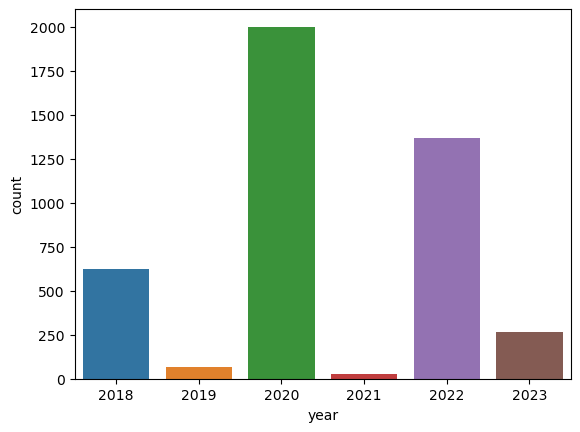

In [9]:
sns.countplot(mergedDataset, x='year')

C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\2820743737.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(mergedDataset.groupby(['year']).sum().reset_index(), x='year', y='# Casualties')


<Axes: xlabel='year', ylabel='# Casualties'>

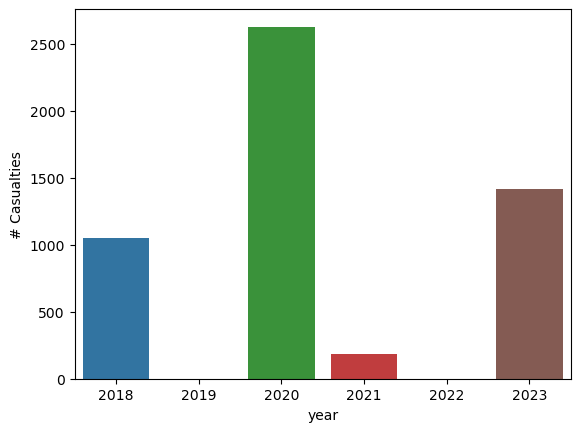

In [10]:
sns.barplot(mergedDataset.groupby(['year']).sum().reset_index(), x='year', y='# Casualties')

In [11]:
mergedDataset[mergedDataset['year']==2022].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 2719 to 4088
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Incident ID                   0 non-null      float64       
 1   Incident Date                 1370 non-null   datetime64[ns]
 2   State                         1370 non-null   category      
 3   City Or County                1370 non-null   category      
 4   Address                       1343 non-null   category      
 5   # Victims Injured             0 non-null      float64       
 6   # Victims Killed              0 non-null      float64       
 7   # Subjects-Suspects Injured   0 non-null      float64       
 8   # Subjects-Suspects Killed    0 non-null      float64       
 9   # Subjects-Suspects Arrested  0 non-null      float64       
 10  Operations                    0 non-null      float64       
 11  year                       

In [12]:
def decodeLongLat(county):
    # Initialize Nominatim API
    geolocator = Nominatim(user_agent="MyApp")

    try:
        location = geolocator.geocode(str(county))
        return location.latitude, location.longitude
    except AttributeError:
        pass
    
    if len(county.split())>2:
        start = 2
    else:
        start = 1
    for counter in range(start,len(county.split())):
        dumCounty = ''.join(county.split()[:counter])
        try: 
            print(dumCounty)
            location = geolocator.geocode(str(dumCounty))
            return location.latitude, location.longitude
        except:
            pass

#The cordianates of the latitude and longitude has been obtained and stored in a csv file. 
# There isn't any need to run the code again since it takes over 10mins to run    
#latLo = [decodeLongLat(x) for x in tqdm(mergedDataset['City Or County'].unique())]
#latLo

In [13]:
location = pd.read_csv(os.getcwd()+"\location.csv")
location.drop(location.columns[0:2], axis=1, inplace=True)
location

,Latitude,Longitude,cord
0,29.758938,-95.367697,Houston
1,35.817914,-79.803087,Randleman
2,37.171626,-119.773799,Madera
3,32.753177,-97.332746,Fort Worth
4,32.793166,-94.344488,Marion
...,...,...,...
1367,52.347214,-114.176630,Half Moon Bay
1368,34.051522,-118.129807,Monterey Park
1369,38.746995,-90.240112,Saint Louis (Moline Acres)
1370,37.702390,-113.084910,Cedar City (Enoch)


In [14]:
mergedDataset = mergedDataset.merge(location, how='left', left_on='City Or County', right_on='cord')
mergedDataset.drop(columns=['cord', 'Incident ID'], axis=1, inplace=True)
mergedDataset

,Incident Date,State,City Or County,Address,# Victims Injured,# Victims Killed,# Subjects-Suspects Injured,# Subjects-Suspects Killed,# Subjects-Suspects Arrested,Operations,year,Participant Gender,Participant Name,Participant Age Group,# Casualties,Latitude,Longitude
0,2018-12-30,Texas,Houston,15491 Wallisville Rd,1.0,1.0,0.0,0.0,2.0,NaN,2018,NaN,NaN,NaN,2.0,29.758938,-95.367697
1,2018-12-30,North Carolina,Randleman,1029 High Point St,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN,1.0,35.817914,-79.803087
2,2018-12-30,California,Madera,20000 block of Avenue 6,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN,1.0,37.171626,-119.773799
3,2018-12-29,Texas,Fort Worth,1500 block of E Berry St,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN,1.0,32.753177,-97.332746
4,2018-12-29,Indiana,Marion,2300 block of Gallatin St,0.0,3.0,0.0,0.0,2.0,NaN,2018,NaN,NaN,NaN,3.0,32.793166,-94.344488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,2023-01-01,Illinois,Chicago,300 block of E 57th St,3.0,1.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN,4.0,41.875562,-87.624421
4349,2023-01-01,Florida,Miami Gardens,NW 171st St and NW 30th Ave,9.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN,9.0,25.942038,-80.245604
4350,2023-01-01,North Carolina,Durham,1000 N Miami Blvd,5.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN,5.0,35.996653,-78.901805
4351,2023-01-01,Pennsylvania,Allentown,1140 E Clair St,4.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN,4.0,40.602206,-75.471279


<Axes: xlabel='Longitude', ylabel='Latitude'>

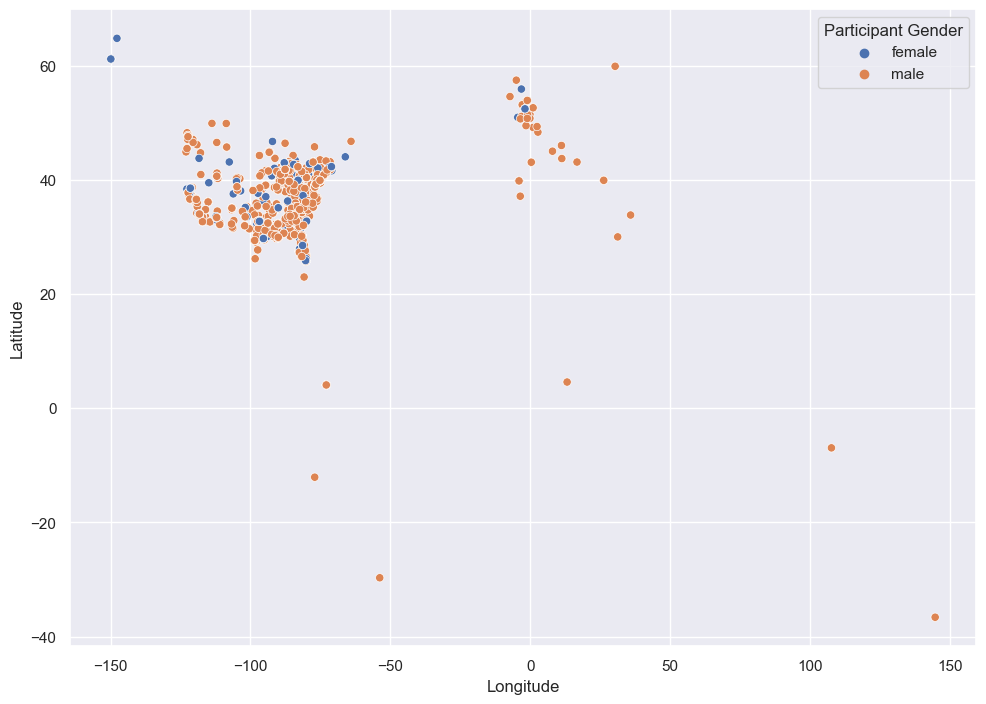

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(mergedDataset, 
                y='Latitude',x='Longitude', hue='Participant Gender')

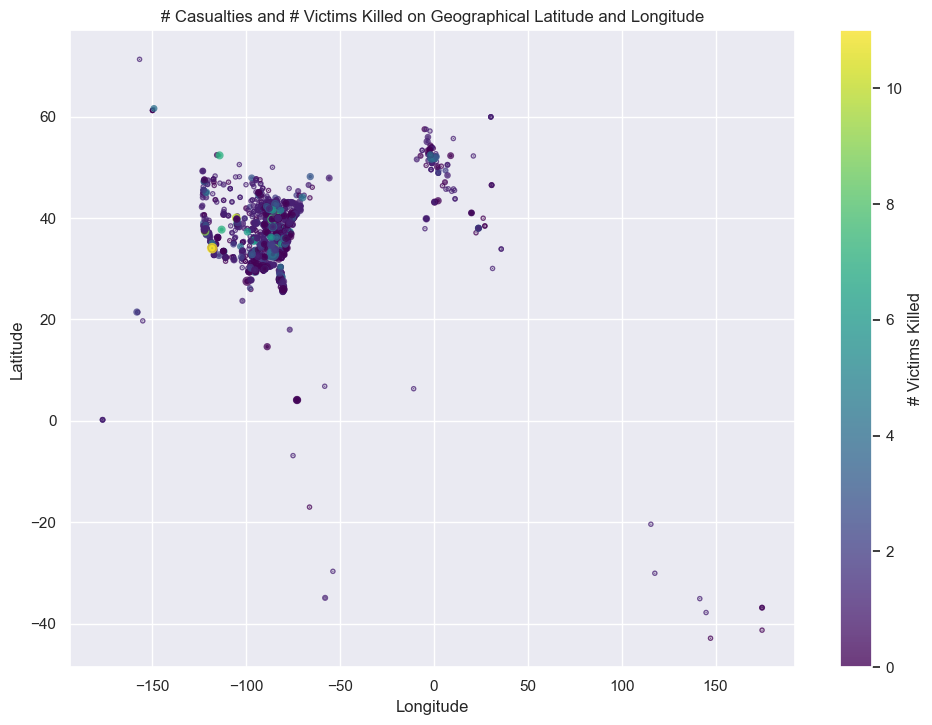

In [16]:
plt.scatter('Longitude', 'Latitude', 
            c='# Victims Killed', data=mergedDataset,
            cmap='viridis', s='# Casualties',
            linewidths=3.0, alpha=0.75)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('# Casualties and # Victims Killed on Geographical Latitude and Longitude')
plt.colorbar(label = '# Victims Killed')


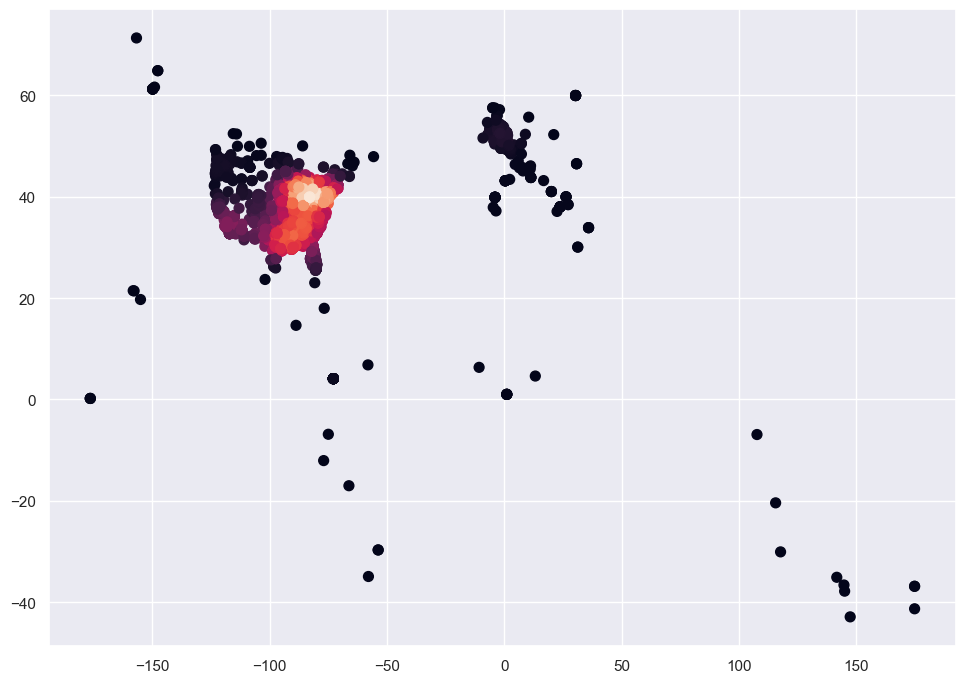

In [17]:
from scipy.stats import gaussian_kde

xy = np.vstack([mergedDataset['Longitude'].fillna(1),mergedDataset['Latitude'].fillna(1)])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(mergedDataset['Longitude'].fillna(1),mergedDataset['Latitude'].fillna(1), c=z, s=50)
plt.show()
#plt.scatter('# Casualties', '# Victims Killed', data=mergedDataset)

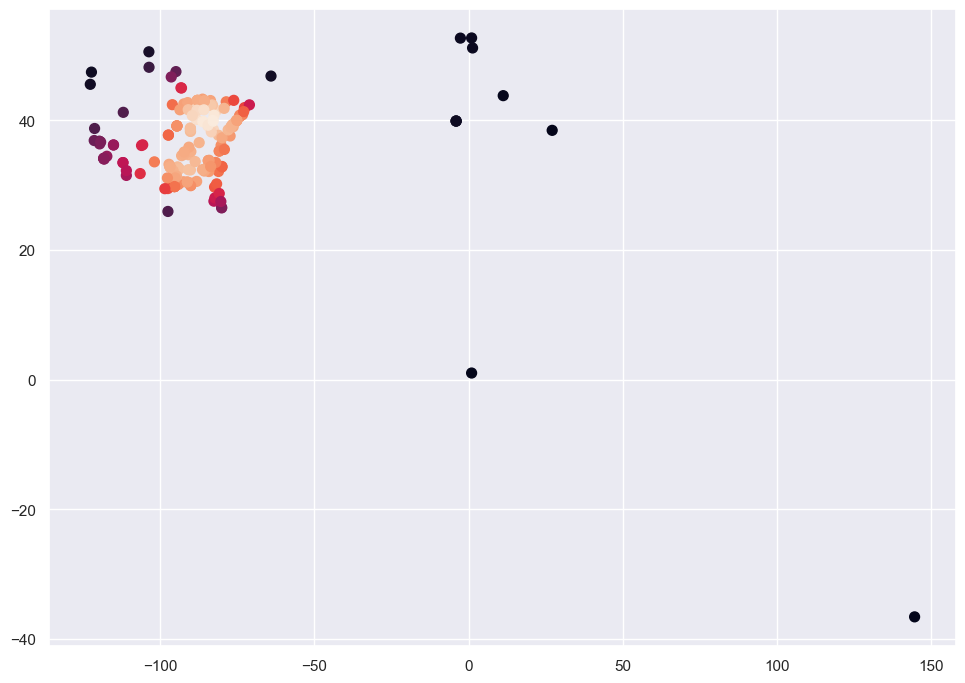

In [18]:
from scipy.stats import gaussian_kde
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018-01-01', end='2023-12-31')

xy = np.vstack([mergedDataset[mergedDataset['Incident Date'].isin(holidays)]['Longitude'].fillna(1),
                mergedDataset[mergedDataset['Incident Date'].isin(holidays)]['Latitude'].fillna(1)])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(mergedDataset[mergedDataset['Incident Date'].isin(holidays)]['Longitude'].fillna(1),
           mergedDataset[mergedDataset['Incident Date'].isin(holidays)]['Latitude'].fillna(1), c=z, s=50)
plt.show()
#plt.scatter('# Casualties', '# Victims Killed', data=mergedDataset)

C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\2278881672.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  statesData = mergedDataset.groupby(['State']).sum().reset_index()


                   State  # Victims Injured  # Victims Killed  \
0                Alabama               66.0              79.0   
1                 Alaska                1.0               6.0   
2                Arizona               30.0              40.0   
3               Arkansas               30.0              39.0   
4             California              161.0             275.0   
5               Colorado               26.0              46.0   
6            Connecticut                7.0              13.0   
7               Delaware                4.0              16.0   
8   District of Columbia               31.0              19.0   
9                Florida              145.0             159.0   
10               Georgia              114.0             121.0   
11                Hawaii                3.0               4.0   
12                 Idaho                0.0               4.0   
13              Illinois              121.0             135.0   
14               Indiana 

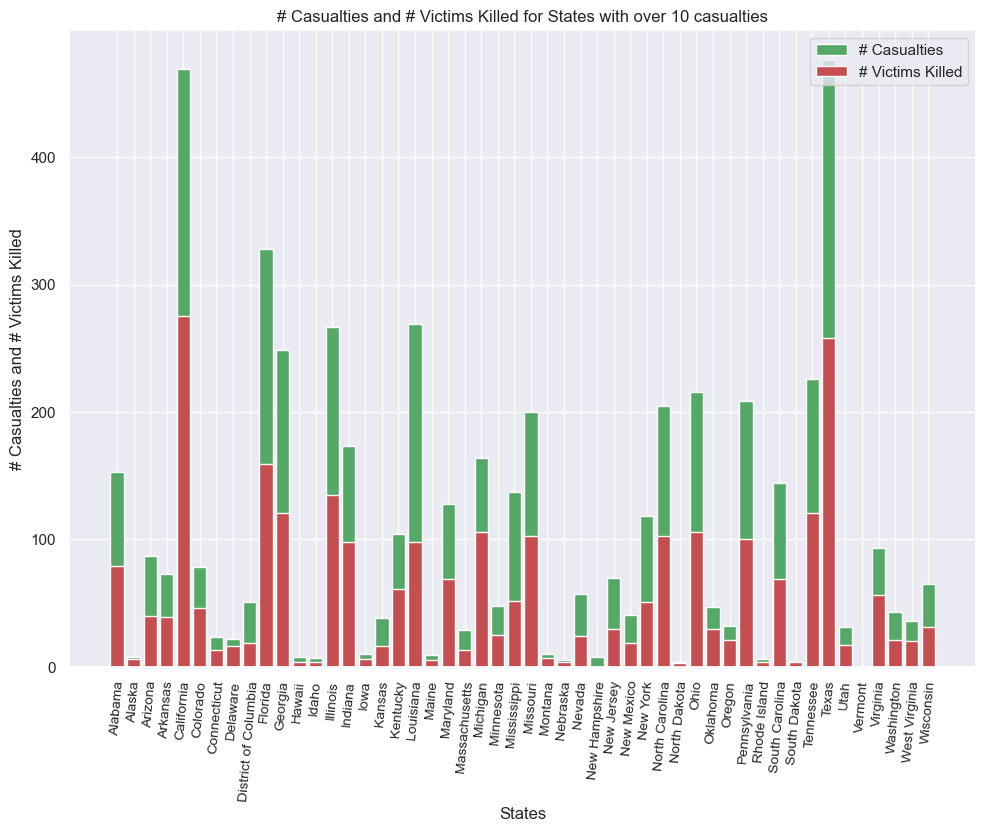

In [19]:
fig, ax = plt.subplots()
statesData = mergedDataset.groupby(['State']).sum().reset_index()
print(statesData)

for colName in ['# Casualties', '# Victims Killed']:
        p = ax.bar(data=statesData, 
                   x='State', height=colName, color='r' if colName.__eq__('# Victims Killed') else 'g')

ax.legend(['# Casualties', '# Victims Killed'], loc='upper right')
plt.xlabel('States')
plt.ylabel('# Casualties and # Victims Killed')
plt.title('# Casualties and # Victims Killed for States with over 10 casualties')
plt.xticks(fontsize=10, rotation=85)
plt.show()

C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\2244774839.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cityData = mergedDataset.groupby(['City Or County']).sum().reset_index()


                   State  # Victims Injured  # Victims Killed  \
0                Alabama               66.0              79.0   
1                 Alaska                1.0               6.0   
2                Arizona               30.0              40.0   
3               Arkansas               30.0              39.0   
4             California              161.0             275.0   
5               Colorado               26.0              46.0   
6            Connecticut                7.0              13.0   
7               Delaware                4.0              16.0   
8   District of Columbia               31.0              19.0   
9                Florida              145.0             159.0   
10               Georgia              114.0             121.0   
11                Hawaii                3.0               4.0   
12                 Idaho                0.0               4.0   
13              Illinois              121.0             135.0   
14               Indiana 

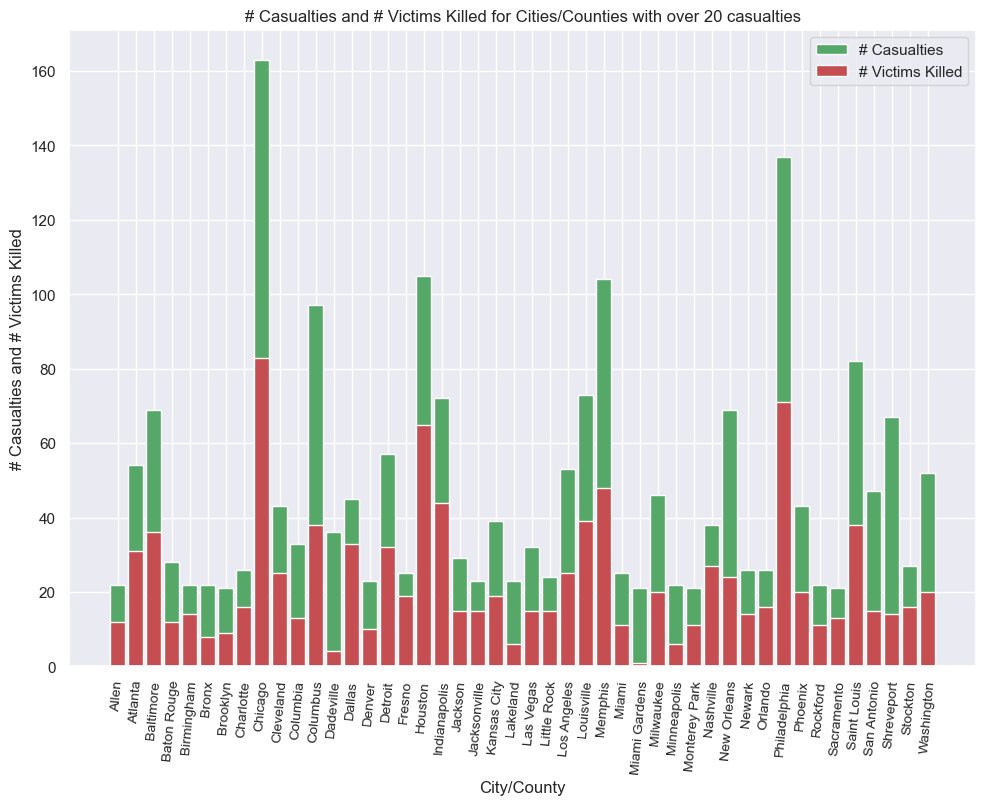

In [20]:
fig, ax = plt.subplots()
cityData = mergedDataset.groupby(['City Or County']).sum().reset_index()
print(statesData)

for colName in ['# Casualties', '# Victims Killed']:
        p = ax.bar(data=cityData[cityData['# Casualties']>20], 
                   x='City Or County', height=colName, color='r' if colName.__eq__('# Victims Killed') else 'g')

ax.legend(['# Casualties', '# Victims Killed'], loc='upper right')
plt.xlabel('City/County')
plt.ylabel('# Casualties and # Victims Killed')
plt.title('# Casualties and # Victims Killed for Cities/Counties with over 20 casualties')
plt.xticks(fontsize=10, rotation=85)
plt.show()

C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\1374967371.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.bar(data=mergedDataset.groupby(['Day Name']).sum().reindex(days).reset_index(), width=0.5,
C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\1374967371.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.bar(data=mergedDataset.groupby(['Day Name']).sum().reindex(days).reset_index(), width=0.5,


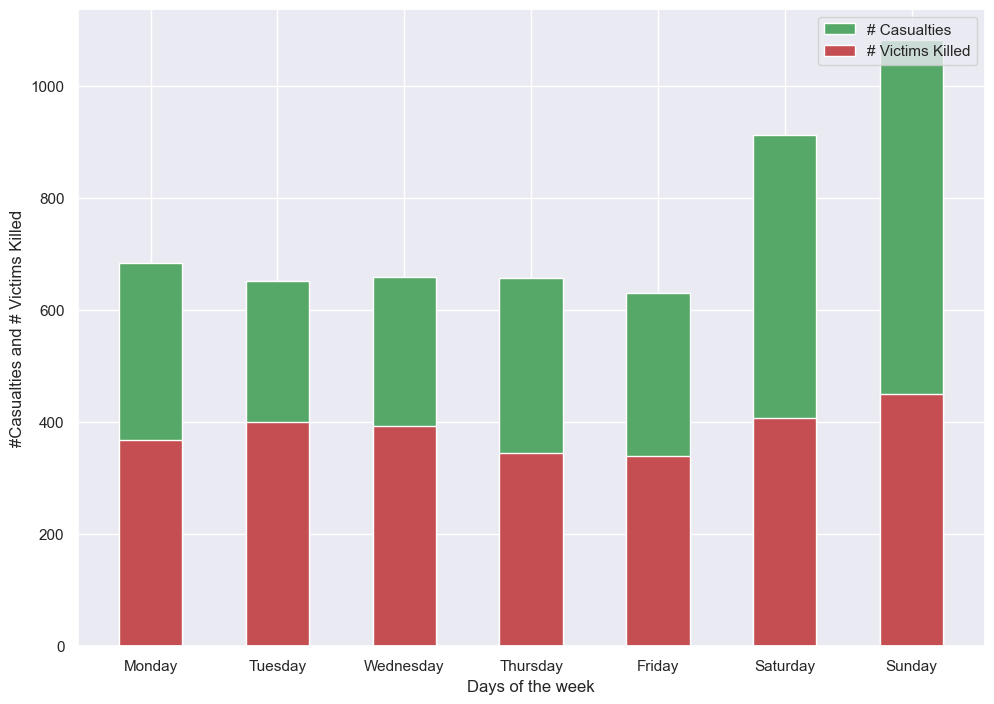

In [21]:
mergedDataset['Day Name'] = mergedDataset['Incident Date'].dt.day_name()
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax = plt.subplots()

for colName in ['# Casualties', '# Victims Killed']:
       ax.bar(data=mergedDataset.groupby(['Day Name']).sum().reindex(days).reset_index(), width=0.5, 
              x='Day Name', height=colName, color='r' if colName.__eq__('# Victims Killed') else 'g')

ax.legend(['# Casualties', '# Victims Killed'], loc='upper right')
plt.xlabel('Days of the week')
plt.ylabel('#Casualties and # Victims Killed')
plt.show()

C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\2190825617.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.bar(data=mergedDataset.groupby(['Month']).sum().reindex(months).reset_index(), width=0.5,
C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\2190825617.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.bar(data=mergedDataset.groupby(['Month']).sum().reindex(months).reset_index(), width=0.5,


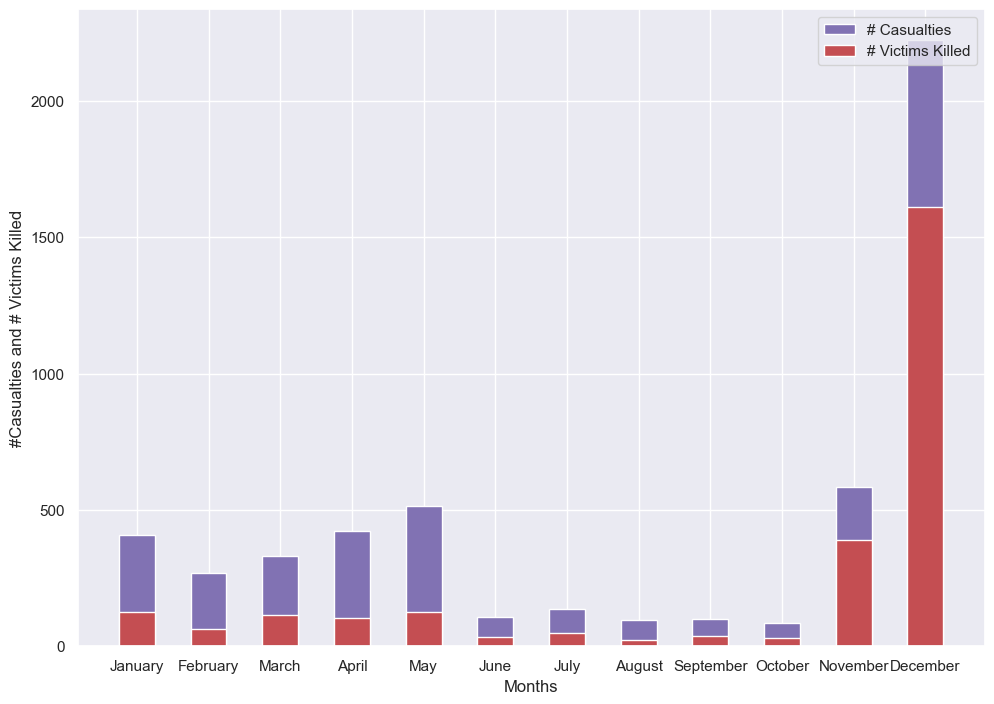

In [22]:
mergedDataset['Month'] = mergedDataset['Incident Date'].dt.month_name()
months = [ 'January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']
fig, ax = plt.subplots()

for colName in ['# Casualties', '# Victims Killed']:
       ax.bar(data=mergedDataset.groupby(['Month']).sum().reindex(months).reset_index(), width=0.5, 
              x='Month', height=colName, color='r' if colName.__eq__('# Victims Killed') else 'm')

ax.legend(['# Casualties', '# Victims Killed'], loc='upper right')
plt.xlabel('Months')
plt.ylabel('#Casualties and # Victims Killed')
plt.show()

C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\3387907086.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datesData = mergedDataset.groupby('Incident Date').sum().reset_index()


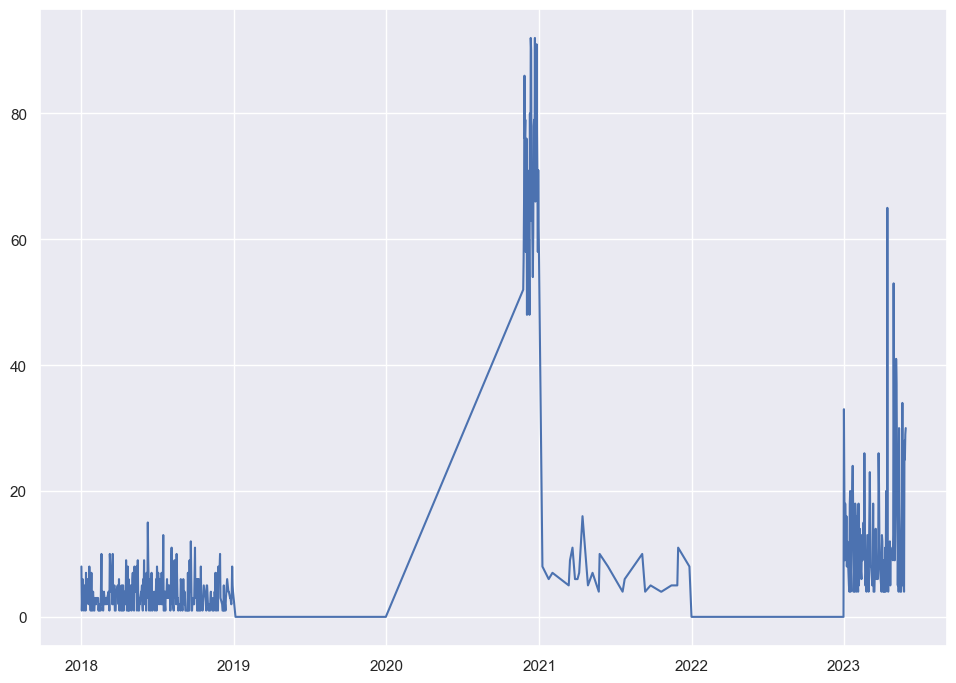

In [23]:
datesData = mergedDataset.groupby('Incident Date').sum().reset_index()
plt.plot('Incident Date', '# Casualties',data=datesData[~datesData['year'].isin(['2019','2022'])], 
        color='b')
plt.show()

C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\2218841445.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weeklyData = mergedDataset.resample('W-MON', on='Incident Date').sum().reset_index()


<BarContainer object of 53 artists>

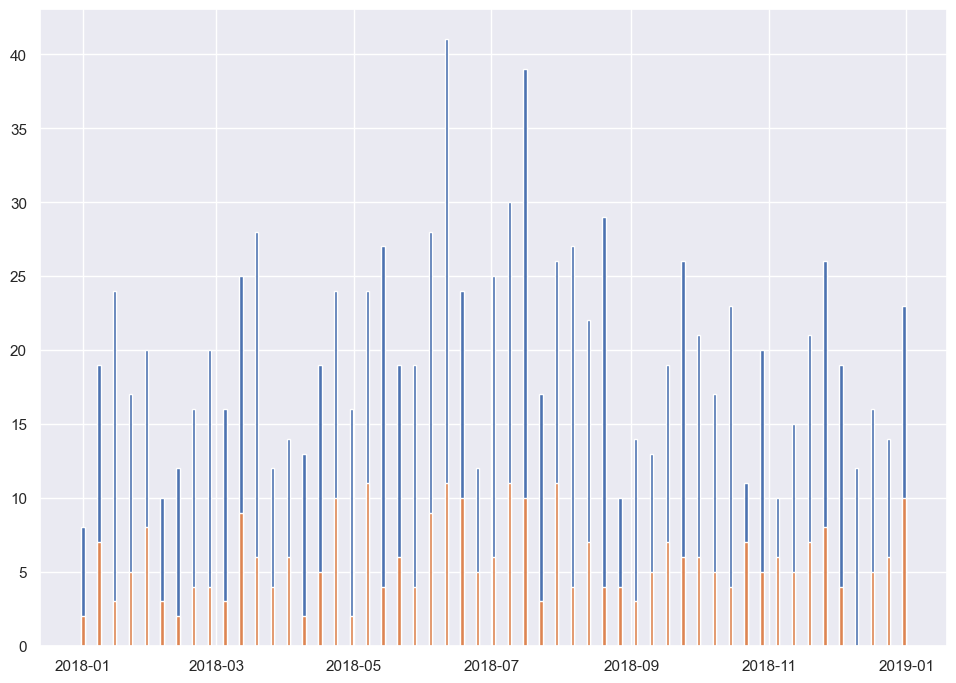

In [24]:
weeklyData = mergedDataset.resample('W-MON', on='Incident Date').sum().reset_index()
plt.bar(data=weeklyData[pd.DatetimeIndex(weeklyData['Incident Date']).year==2018],
        height='# Casualties', x='Incident Date',width=1.5)
plt.bar(data=weeklyData[pd.DatetimeIndex(weeklyData['Incident Date']).year==2018],
        height='# Victims Killed', x='Incident Date',width=1.5)

C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\2947866387.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(8.5)
C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\2947866387.py:12: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_rotation(80)


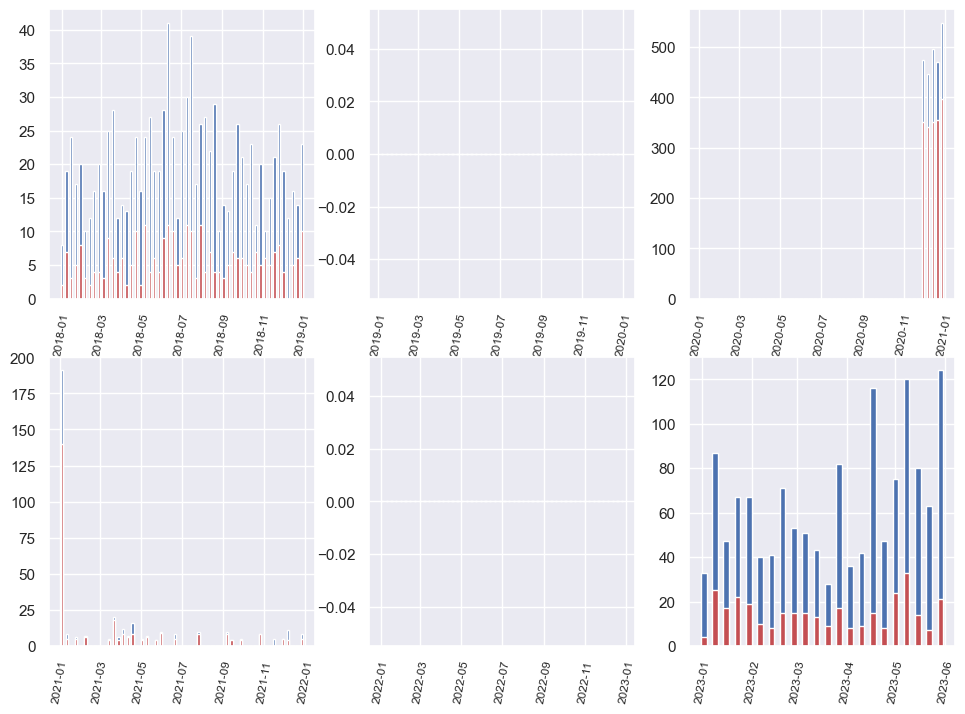

In [25]:
years = np.arange(2018,2024)
fig, axs = plt.subplots(2, math.ceil(len(years)/2))
yearIndex = 0
for i in range(2):
        for j in range(math.ceil(len(years)/2)):
                axs[i,j].bar(data=weeklyData[pd.DatetimeIndex(weeklyData['Incident Date']).year==years[yearIndex]],
                        height='# Casualties', x='Incident Date',width=3.5)
                axs[i,j].bar(data=weeklyData[pd.DatetimeIndex(weeklyData['Incident Date']).year==years[yearIndex]],
                        height='# Victims Killed', x='Incident Date',width=3.5, color='r')
                for tick in axs[i,j].xaxis.get_major_ticks():
                        tick.label.set_fontsize(8.5) 
                        tick.label.set_rotation(80)
                yearIndex += 1
                if yearIndex == len(years):
                        break

C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\3614298062.py:13: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(8.5)
C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9880\3614298062.py:14: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_rotation('vertical')


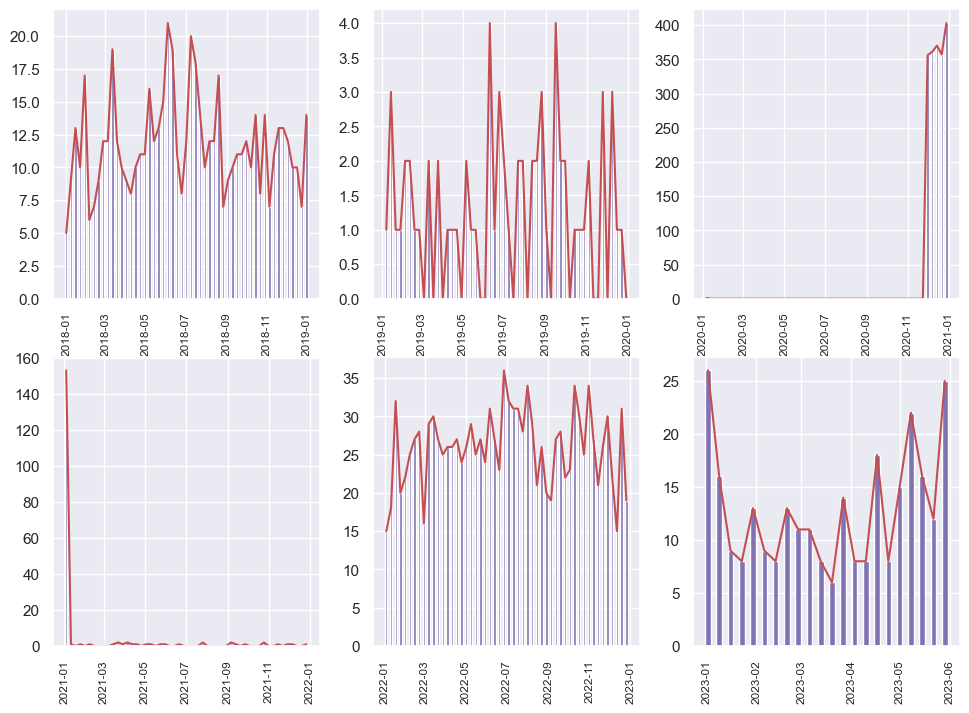

In [26]:
weeklyCounts = mergedDataset.resample('W-MON', on='Incident Date').size().reset_index(name='Counts')
years = np.arange(2018,2024)
fig, axs = plt.subplots(2, math.ceil(len(years)/2))
yearIndex = 0
for i in range(2):
        for j in range(math.ceil(len(years)/2)):
                axs[i,j].bar(data=weeklyCounts[pd.DatetimeIndex(weeklyCounts['Incident Date']).year==years[yearIndex]],
                        height='Counts', x='Incident Date',width=3.5, color='m')
                axs[i,j].plot('Incident Date', 'Counts',
                        data=weeklyCounts[pd.DatetimeIndex(weeklyCounts['Incident Date']).year==years[yearIndex]],
                        color='r')
                for tick in axs[i,j].xaxis.get_major_ticks():
                        tick.label.set_fontsize(8.5) 
                        tick.label.set_rotation('vertical')
                yearIndex += 1
                if yearIndex == len(years):
                        break


In [27]:
mergedDataset.groupby('Participant Age Group').size()

Participant Age Group
Adult 18+       68
Teen 12-17    1370
dtype: int64

In [28]:
mergedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4353 entries, 0 to 4352
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Incident Date                 4353 non-null   datetime64[ns]
 1   State                         4353 non-null   category      
 2   City Or County                4353 non-null   object        
 3   Address                       4273 non-null   category      
 4   # Victims Injured             2915 non-null   float64       
 5   # Victims Killed              2915 non-null   float64       
 6   # Subjects-Suspects Injured   2915 non-null   float64       
 7   # Subjects-Suspects Killed    2915 non-null   float64       
 8   # Subjects-Suspects Arrested  2915 non-null   float64       
 9   Operations                    0 non-null      float64       
 10  year                          4353 non-null   int64         
 11  Participant Gender            

Text(0.5, 0, 'Number of entries')

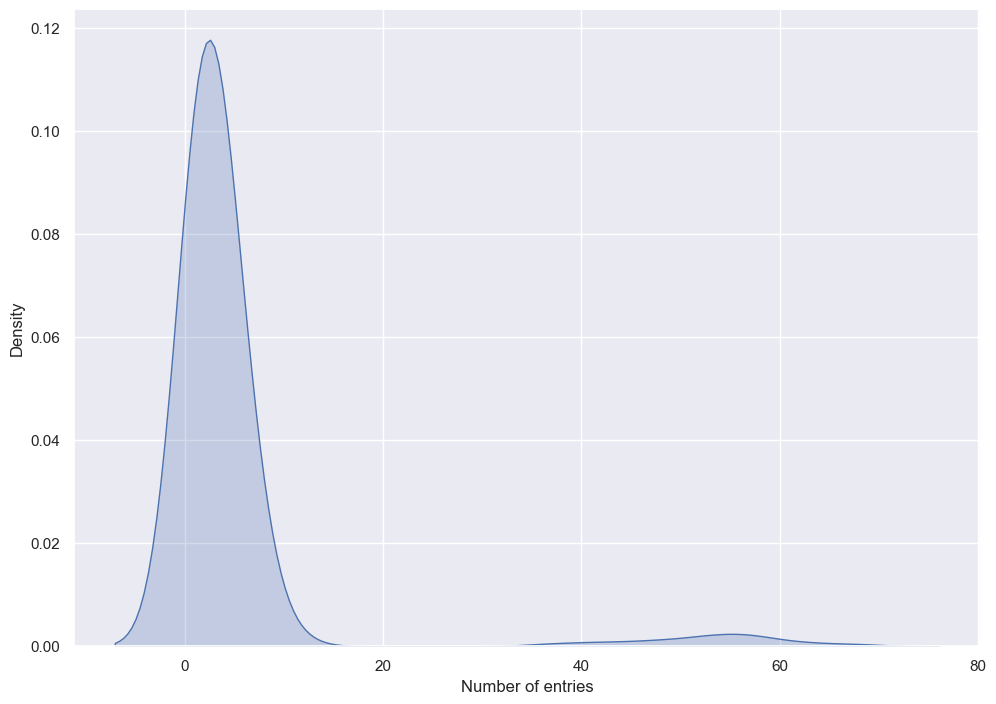

In [29]:
number_of_entries = []
newData= mergedDataset.groupby('Incident Date').size().reset_index(name='Count')
for d in newData['Incident Date']:
    number_of_entries.append(newData[newData['Incident Date']==d]['Count'])
sns.kdeplot(newData['Count'],fill=True)
plt.xlabel('Number of entries')

In [30]:
display(mergedDataset.head())
display(mergedDataset.describe())

,Incident Date,State,City Or County,Address,# Victims Injured,# Victims Killed,# Subjects-Suspects Injured,# Subjects-Suspects Killed,# Subjects-Suspects Arrested,Operations,year,Participant Gender,Participant Name,Participant Age Group,# Casualties,Latitude,Longitude,Day Name,Month
0,2018-12-30,Texas,Houston,15491 Wallisville Rd,1.0,1.0,0.0,0.0,2.0,NaN,2018,NaN,NaN,NaN,2.0,29.758938,-95.367697,Sunday,December
1,2018-12-30,North Carolina,Randleman,1029 High Point St,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN,1.0,35.817914,-79.803087,Sunday,December
2,2018-12-30,California,Madera,20000 block of Avenue 6,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN,1.0,37.171626,-119.773799,Sunday,December
3,2018-12-29,Texas,Fort Worth,1500 block of E Berry St,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN,1.0,32.753177,-97.332746,Saturday,December
4,2018-12-29,Indiana,Marion,2300 block of Gallatin St,0.0,3.0,0.0,0.0,2.0,NaN,2018,NaN,NaN,NaN,3.0,32.793166,-94.344488,Saturday,December


,# Victims Injured,# Victims Killed,# Subjects-Suspects Injured,# Subjects-Suspects Killed,# Subjects-Suspects Arrested,Operations,year,# Casualties,Latitude,Longitude
count,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,0.0,4353.000000,2915.000000,4348.000000,4348.000000
mean,0.740309,0.928645,0.025386,0.116295,0.488508,NaN,2020.515966,1.810635,36.810559,-86.111100
std,1.543736,0.859194,0.165817,0.330125,0.817273,NaN,1.460662,1.723657,7.407418,26.218511
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2018.000000,1.000000,-42.882509,-176.477936
25%,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,2020.000000,1.000000,32.910193,-95.367697
50%,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,2020.000000,1.000000,37.563250,-87.624421
75%,1.000000,1.000000,0.000000,0.000000,1.000000,NaN,2022.000000,2.000000,40.746959,-80.347186
max,32.000000,11.000000,2.000000,4.000000,10.000000,NaN,2023.000000,36.000000,71.290556,174.777211


In [50]:
dataset = mergedDataset[['Incident Date','State','City Or County']].copy()
dataset['Day'] = dataset['Incident Date'].dt.day
dataset['Day of week'] = dataset['Incident Date'].dt.dayofweek
dataset['Month'] = dataset['Incident Date'].dt.month
dataset['Weekend'] = (dataset['Day of week']>4)*1
dataset['Holiday'] = (dataset['Incident Date'].isin(holidays))*1
dataset['City Or County'] = dataset['City Or County'].astype('category')
dataset.sort_values('Incident Date', inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [51]:
mergedDataset.sort_values('Incident Date').to_csv(os.getcwd()+"\\mergedDataset.csv", index=False)

In [52]:
display(dataset.describe())
display(dataset)

,Day,Day of week,Month,Weekend,Holiday
count,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000
mean,16.913393,3.182403,8.748909,0.334712,0.043189
std,9.027307,2.039092,3.767623,0.471944,0.203305
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,9.000000,1.000000,5.000000,0.000000,0.000000
50%,17.000000,3.000000,11.000000,0.000000,0.000000
75%,25.000000,5.000000,12.000000,1.000000,0.000000
max,31.000000,6.000000,12.000000,1.000000,1.000000


,Incident Date,State,City Or County,Day,Day of week,Month,Weekend,Holiday
0,2018-01-01,California,Los Angeles,1,0,1,0,1
1,2018-01-01,Alabama,Bessemer (Concord),1,0,1,0,1
2,2018-01-01,North Carolina,Charlotte,1,0,1,0,1
3,2018-01-01,Michigan,Flint,1,0,1,0,1
4,2018-01-01,California,Los Angeles,1,0,1,0,1
...,...,...,...,...,...,...,...,...
4348,2023-05-29,South Carolina,Hollywood,29,0,5,0,1
4349,2023-05-29,Illinois,Peoria,29,0,5,0,1
4350,2023-05-29,Ohio,Canal Winchester,29,0,5,0,1
4351,2023-05-29,New York,Syracuse,29,0,5,0,1


In [53]:
dataset['City Or County'] = dataset['City Or County'].cat.codes
dataset['State'] = dataset['State'].cat.codes
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Incident Date   4353 non-null   datetime64[ns]
 1   State           4353 non-null   int8          
 2   City Or County  4353 non-null   int16         
 3   Day             4353 non-null   int64         
 4   Day of week     4353 non-null   int64         
 5   Month           4353 non-null   int64         
 6   Weekend         4353 non-null   int32         
 7   Holiday         4353 non-null   int32         
dtypes: datetime64[ns](1), int16(1), int32(2), int64(3), int8(1)
memory usage: 182.9 KB


None

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, RandomOverSampler

labels = dataset[['State', 'City Or County']]
dataset.drop(columns=['Incident Date','State','City Or County'], inplace=True)
trainLen = int(len(dataset)*0.8)
numClasses1 = len(labels['State'].unique())
numClasses2 = len(labels['City Or County'].unique())

sm = RandomOverSampler(random_state=123)
dataset, labels = sm.fit_resample(dataset.to_numpy(), labels.to_numpy()[:,1])
#dataset = np.reshape(dataset, [dataset.shape[1],dataset.shape[2]])
#labesl = np.reshape(labels, [labels.shape[1],1])

ind = np.arange(len(dataset))
np.random.shuffle(ind)
dataset = dataset[ind,:]
labels = labels[ind]
print(dataset.shape, labels.shape)
xTrain, xTest, yTrain, yTest = train_test_split(dataset, labels,
                                                                test_size=0.2, random_state=123)
"""labelEncoder = LabelEncoder()
classifier = LogisticRegression(random_state=123).fit(xTrain, yTrain)
dataPipeline = sklearn.pipeline.Pipeline([('encoder', labelEncoder)])"""


(211750, 5) (211750,)


"labelEncoder = LabelEncoder()\nclassifier = LogisticRegression(random_state=123).fit(xTrain, yTrain)\ndataPipeline = sklearn.pipeline.Pipeline([('encoder', labelEncoder)])"

In [55]:
xTrain = xTrain.reshape((xTrain.shape[0],1, xTrain.shape[1]))
xTest = xTest.reshape((xTest.shape[0],1, xTest.shape[1]))

In [56]:
xTrain

array([[[26,  1,  4,  0,  0]],

       [[27,  5,  5,  1,  0]],

       [[ 5,  6,  2,  1,  0]],

       ...,

       [[10,  4,  6,  0,  0]],

       [[12,  5,  2,  1,  0]],

       [[ 8,  1, 12,  0,  0]]], dtype=int64)

In [57]:
batchSize = 64
shuffleBufferSize = 100

trainData = tf.data.Dataset.from_tensor_slices((xTrain, yTrain))
testData = tf.data.Dataset.from_tensor_slices((xTest, yTest))

trainDataBatch = trainData.shuffle(shuffleBufferSize).batch(batchSize)
testDataBatch = testData.batch(batchSize)

In [58]:
xTrain, yTrain = next(iter(trainDataBatch))

In [59]:
def nnModel(inputShape):
    inputLayer = tf.keras.layers.Input(inputShape)

    conv1 = tf.keras.layers.Conv1D(filters=128, kernel_size=3,padding="same")(inputLayer)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    conv1 = tf.keras.layers.ReLU()(conv1)

    conv2 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv1)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    conv2 = tf.keras.layers.ReLU()(conv2)

    conv3 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = tf.keras.layers.BatchNormalization()(conv2)
    conv3 = tf.keras.layers.ReLU()(conv3)

    gap = tf.keras.layers.GlobalAveragePooling1D()(conv3)
    
    outputLayer = tf.keras.layers.Dense(numClasses2, activation="softmax")(gap)

    return tf.keras.Model(inputs=inputLayer, outputs=outputLayer)
    
model = nnModel(inputShape=(1,5,))
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [60]:
lossObject = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

def loss(model, x , y, training):
    y_ = model(x, training=training)

    return lossObject(y_true=y, y_pred=y_)

l = loss(model, xTrain, yTrain,training=False)
print("Loss test: {}".format(l))

Loss test: 7.220241546630859


In [61]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        lossValue = loss(model, inputs, targets, training=True)
    return lossValue, tape.gradient(lossValue, model.trainable_variables)

In [62]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

trainLossResults = []
trainAccuracyResults = []

numEpochs = 150

for epoch in range(numEpochs):
    epochLossAvg = tf.keras.metrics.Mean()
    epochAccuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    for x,y in trainDataBatch:
        lossValue, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        epochLossAvg.update_state(lossValue)
        epochAccuracy.update_state(y, model(x, training=True))

    trainLossResults.append(epochLossAvg.result())
    trainAccuracyResults.append(epochAccuracy.result())

    if epoch % 5 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epochLossAvg.result(),
                                                                    epochAccuracy.result()))

Epoch 000: Loss: 6.734, Accuracy: 1.690%
Epoch 005: Loss: 3.686, Accuracy: 27.710%
Epoch 010: Loss: 3.056, Accuracy: 30.854%
Epoch 015: Loss: 2.842, Accuracy: 32.269%
Epoch 020: Loss: 2.742, Accuracy: 33.140%
Epoch 025: Loss: 2.671, Accuracy: 34.015%
Epoch 030: Loss: 2.629, Accuracy: 34.730%
Epoch 035: Loss: 2.601, Accuracy: 35.019%
Epoch 040: Loss: 2.569, Accuracy: 35.702%
Epoch 045: Loss: 2.542, Accuracy: 36.175%
Epoch 050: Loss: 2.533, Accuracy: 36.486%
Epoch 055: Loss: 2.510, Accuracy: 36.907%
Epoch 060: Loss: 2.492, Accuracy: 37.287%
Epoch 065: Loss: 2.473, Accuracy: 37.774%
Epoch 070: Loss: 2.472, Accuracy: 37.919%
Epoch 075: Loss: 2.450, Accuracy: 38.383%
Epoch 080: Loss: 2.438, Accuracy: 38.752%
Epoch 085: Loss: 2.432, Accuracy: 38.818%
Epoch 090: Loss: 2.419, Accuracy: 39.151%
Epoch 095: Loss: 2.407, Accuracy: 39.407%
Epoch 100: Loss: 2.402, Accuracy: 39.425%
Epoch 105: Loss: 2.398, Accuracy: 39.548%
Epoch 110: Loss: 2.386, Accuracy: 40.015%
Epoch 115: Loss: 2.388, Accuracy: 3

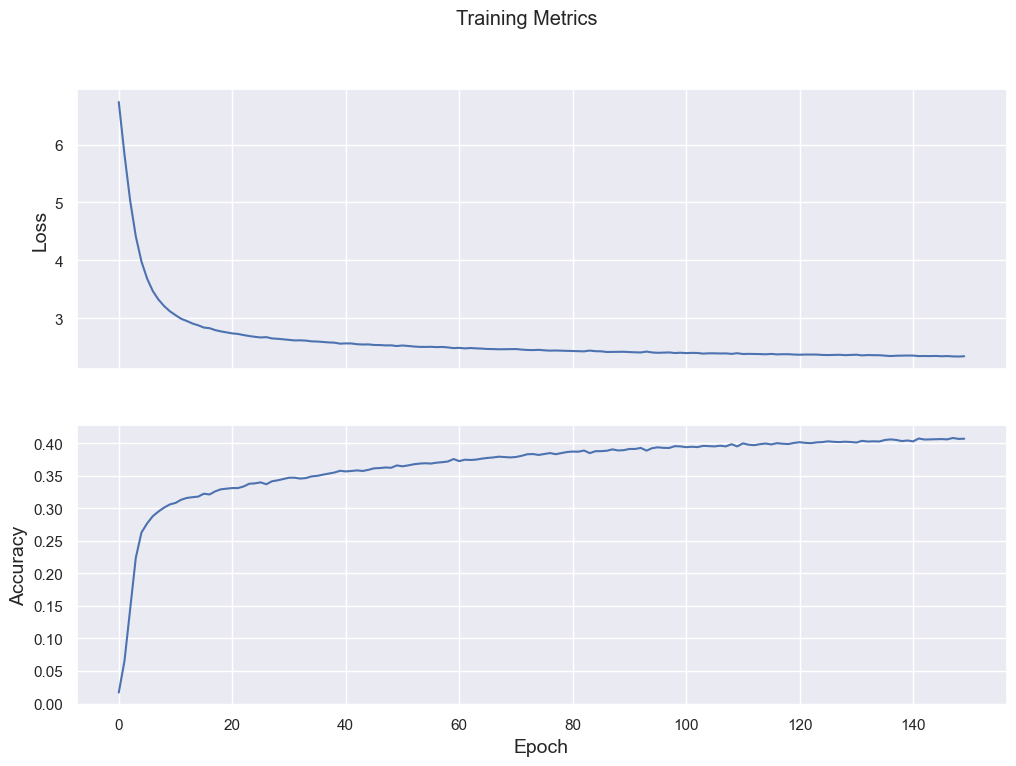

In [63]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12,8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(trainLossResults)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(trainAccuracyResults)
plt.savefig('model metrics', bbox_inches='tight')
plt.show()

In [64]:
testAccuracy = tf.keras.metrics.Accuracy()

for (x,y) in testDataBatch:
    logits = model(x, training=False)
    prediction = tf.math.argmax(logits, axis=1, output_type=tf.int16)
    testAccuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(testAccuracy.result()))

Test set accuracy: 33.469%


In [49]:
tf.stack([y,prediction], axis=1)

<tf.Tensor: shape=(110, 2), dtype=int16, numpy=
array([[1102, 1102],
       [ 161, 1119],
       [ 409,  350],
       [ 576,  576],
       [1340, 1205],
       [   3,    3],
       [ 829,  829],
       [ 995,  192],
       [ 265, 1119],
       [ 924,  924],
       [ 894, 1291],
       [1160,  181],
       [1040,  393],
       [1165,  192],
       [ 936,  782],
       [1113, 1113],
       [1270, 1205],
       [ 115,  132],
       [1281,  188],
       [ 653, 1314],
       [ 129, 1023],
       [ 126,  126],
       [ 149,  149],
       [ 130,  782],
       [ 862, 1093],
       [ 281,  448],
       [ 896,  896],
       [1025,  945],
       [ 335,  149],
       [1038,  989],
       [ 991,  991],
       [1340, 1222],
       [ 752,  375],
       [ 981,  182],
       [ 185,  512],
       [1162,  928],
       [ 288, 1361],
       [ 644,  683],
       [1172,  989],
       [1305,  487],
       [1019, 1019],
       [1206, 1206],
       [1073,  357],
       [ 487,  487],
       [ 568,  568],
       

In [59]:
xTrain = xTrain.reshape((xTrain.shape[0], xTrain.shape[1], 1))
xTest = xTest.reshape((xTest.shape[0], xTest.shape[1], 1))


In [116]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    #output_layer1 = keras.layers.Dense(numClasses1, activation="softmax")(gap)
    output_layer2 = keras.layers.Dense(numClasses2, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=[output_layer2])


model = make_model(input_shape=xTrain.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [83]:
class WeightedCrossEntropy(tf.keras.losses.Loss):
    def __init__(self, epsilon=1e-7, name="weighted_cross_entropy", **kwargs):
        super().__init__(name=name, **kwargs)
        #self.weight = weight
        self.epsilon = epsilon

    def call(self, y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, self.epsilon, 1-self.epsilon)
        y_true = tf.cast(y_true, tf.float32)
        elements = -tf.math.multiply_no_nan(x=tf.math.log(y_pred), y=y_true)
        return tf.reduce_mean(tf.reduce_sum(elements,axis=1))
    
    def get_config(self):
        config = {
            #'weight': self.weight,
            'epsilon': self.epsilon
        }
        base_config = super().get_config()
        return {**base_config, **config}

In [117]:
epochs = 200
batch_size = 128

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    xTrain,
    [yTrain],
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/200
 486/1059 [============>.................] - ETA: 8s - loss: 5.1678 - sparse_categorical_accuracy: 0.0843

KeyboardInterrupt: 

In [66]:
model = keras.models.load_model("best_model.h5")

test_ = [model.evaluate(xTest, [yTest])]

print(test_)
#print("Test accuracy", test_acc)
#print("Test loss", test_loss)

1324/1324 [==============================] - 7s 5ms/step - loss: 2.0454 - sparse_categorical_accuracy: 0.3583
[[2.045438289642334, 0.35827627778053284]]


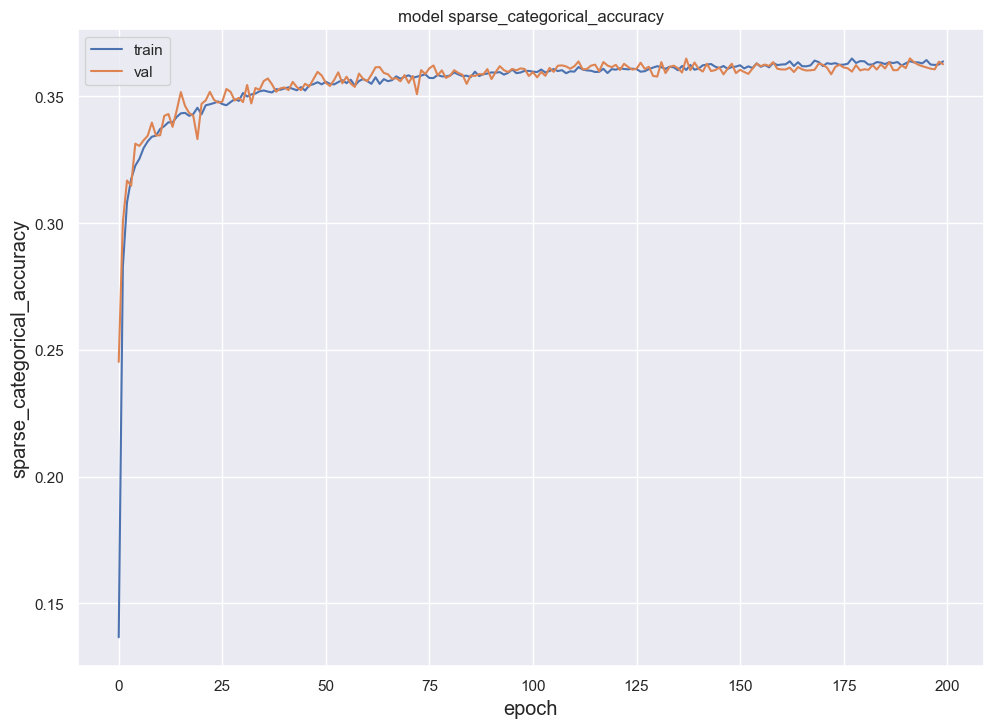

In [69]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.savefig('model accuracy', bbox_inches='tight')
plt.show()
plt.close()